In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [36]:
df=pd.read_csv('datasets/Covid-19 stats.csv')
df.head()

,Unnamed: 0,continent,country,population,day,time,cases_new,cases_active,cases_critical,cases_recovered,cases_1M_pop,cases_total,deaths_new,deaths_1M_pop,deaths_total,tests1M_pop,teststotal
0,0,South-America,Falkland-Islands,3539.0,2024-07-10,2024-07-10T12:30:31+00:00,NaN,0.0,NaN,1930.0,545352.0,1930,NaN,NaN,NaN,2439107.0,8632.0
1,1,North-America,Montserrat,4965.0,2024-07-10,2024-07-10T12:30:31+00:00,NaN,19.0,NaN,1376.0,282578.0,1403,NaN,1611.0,8.0,3577442.0,17762.0
2,2,NaN,Diamond-Princess,NaN,2024-07-10,2024-07-10T12:30:31+00:00,NaN,0.0,NaN,699.0,NaN,712,NaN,NaN,13.0,NaN,NaN
3,3,Europe,Vatican-City,799.0,2024-07-10,2024-07-10T12:30:31+00:00,NaN,0.0,NaN,29.0,36295.0,29,NaN,NaN,NaN,NaN,NaN
4,4,Africa,Western-Sahara,626161.0,2024-07-10,2024-07-10T12:30:31+00:00,NaN,0.0,NaN,9.0,16.0,10,NaN,2.0,1.0,NaN,NaN


In [37]:
#First things first get rid of unwanted columns
df.columns

Index(['Unnamed: 0', 'continent', 'country', 'population', 'day', 'time',
       'cases_new', 'cases_active', 'cases_critical', 'cases_recovered',
       'cases_1M_pop', 'cases_total', 'deaths_new', 'deaths_1M_pop',
       'deaths_total', 'tests1M_pop', 'teststotal'],
      dtype='object')

In [38]:
df.drop(['day','time'],axis=1,inplace=True)


In [39]:
df.head()

,Unnamed: 0,continent,country,population,cases_new,cases_active,cases_critical,cases_recovered,cases_1M_pop,cases_total,deaths_new,deaths_1M_pop,deaths_total,tests1M_pop,teststotal
0,0,South-America,Falkland-Islands,3539.0,NaN,0.0,NaN,1930.0,545352.0,1930,NaN,NaN,NaN,2439107.0,8632.0
1,1,North-America,Montserrat,4965.0,NaN,19.0,NaN,1376.0,282578.0,1403,NaN,1611.0,8.0,3577442.0,17762.0
2,2,NaN,Diamond-Princess,NaN,NaN,0.0,NaN,699.0,NaN,712,NaN,NaN,13.0,NaN,NaN
3,3,Europe,Vatican-City,799.0,NaN,0.0,NaN,29.0,36295.0,29,NaN,NaN,NaN,NaN,NaN
4,4,Africa,Western-Sahara,626161.0,NaN,0.0,NaN,9.0,16.0,10,NaN,2.0,1.0,NaN,NaN


In [40]:
# Delete all rows with not real data from the column
df = df[df['continent'] != 'All']
df = df[df['continent']!='NaN']

In [41]:
df = df.dropna(subset=['continent'], how='all')

In [42]:
df.shape

(235, 15)

In [43]:
df.head()

,Unnamed: 0,continent,country,population,cases_new,cases_active,cases_critical,cases_recovered,cases_1M_pop,cases_total,deaths_new,deaths_1M_pop,deaths_total,tests1M_pop,teststotal
0,0,South-America,Falkland-Islands,3.539000e+03,NaN,0.0,NaN,1930.0,545352.0,1930,NaN,NaN,NaN,2439107.0,8632.0
1,1,North-America,Montserrat,4.965000e+03,NaN,19.0,NaN,1376.0,282578.0,1403,NaN,1611.0,8.0,3577442.0,17762.0
3,3,Europe,Vatican-City,7.990000e+02,NaN,0.0,NaN,29.0,36295.0,29,NaN,NaN,NaN,NaN,NaN
4,4,Africa,Western-Sahara,6.261610e+05,NaN,0.0,NaN,9.0,16.0,10,NaN,2.0,1.0,NaN,NaN
6,6,Asia,China,1.448471e+09,NaN,118977.0,NaN,379053.0,347.0,503302,NaN,4.0,5272.0,110461.0,160000000.0


Text(0.5, 1.0, 'Total Cases by Continent')

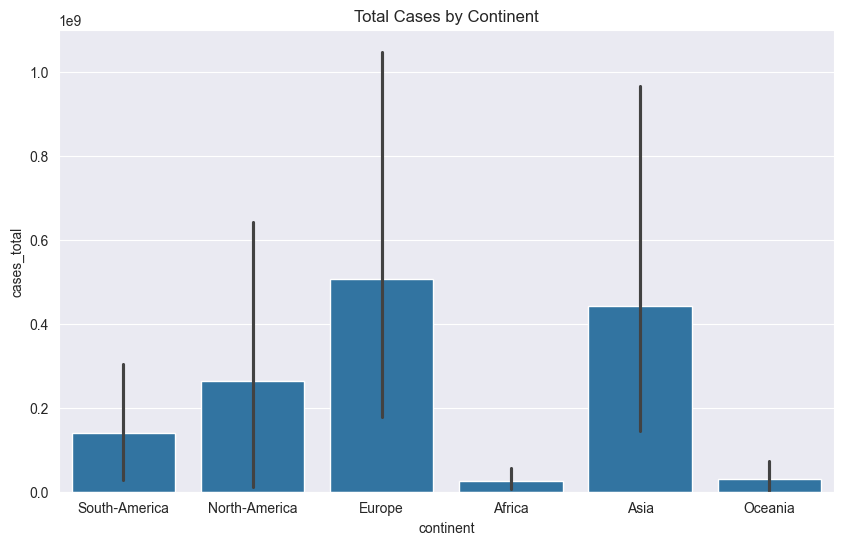

In [44]:
#Visualize the data of total cases by their continent
plt.figure(figsize=(10, 6))


sns.barplot(x='continent', y='cases_total', data=df, estimator=sum)
plt.title('Total Cases by Continent')




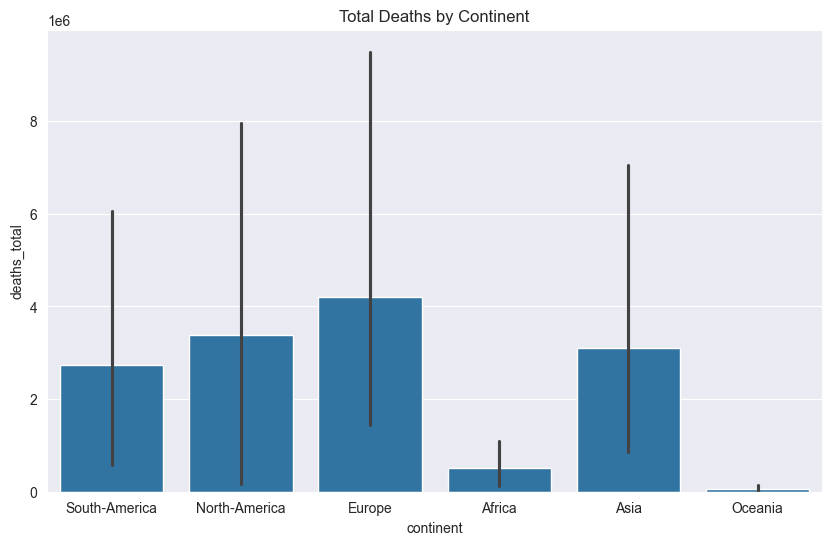

In [45]:
#Visualize the data of total cases by their continent

plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='deaths_total', data=df, estimator=sum)
plt.title('Total Deaths by Continent')

plt.show()

In [46]:
#Groupby the deaths and cases to compare them for each contitnent
temp_deaths=df['deaths_total'].groupby(df['continent']).sum()
temp_cases=df['cases_total'].groupby(df['continent']).sum()
temp_continent=df['continent'].unique()

In [47]:
temp_cases

continent
Africa            25721848
Asia             443000530
Europe           506812396
North-America    263778264
Oceania           29791542
South-America    140401758
Name: cases_total, dtype: int64

In [48]:
temp_deaths

continent
Africa            517784.0
Asia             3107324.0
Europe           4203648.0
North-America    3391882.0
Oceania            66030.0
South-America    2734664.0
Name: deaths_total, dtype: float64

Here we can see that the number difference between cases and deaths is huge hence the cases ratio is reduced 

The cases_total Ratio is 1:100

In [49]:
temp_case_total=[]
for i in temp_cases:
    i=i/100
    temp_case_total.append(i)

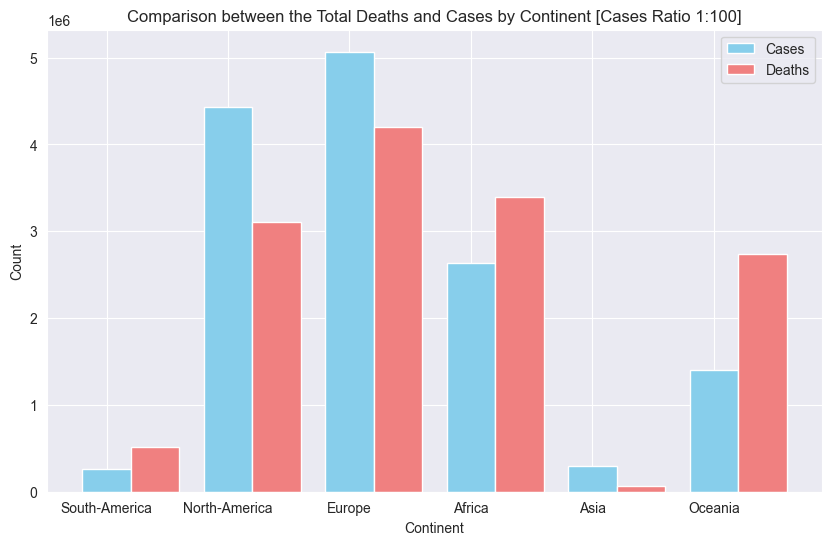

In [50]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
x=np.arange(len(temp_continent))

# Plot a barplot to compare the data between cases_total and deaths_total
plt.bar(temp_continent, temp_case_total, 0.4, label='Cases', color='skyblue')
plt.bar(x+0.4, temp_deaths, 0.4, label='Deaths', color='lightcoral')

# Set axis labels and title
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Comparison between the Total Deaths and Cases by Continent [Cases Ratio 1:100]')
plt.legend()




In [51]:
#Drop all the textual data for plotting Correlation Matrix
data=df.drop(['continent','country'], axis=1)

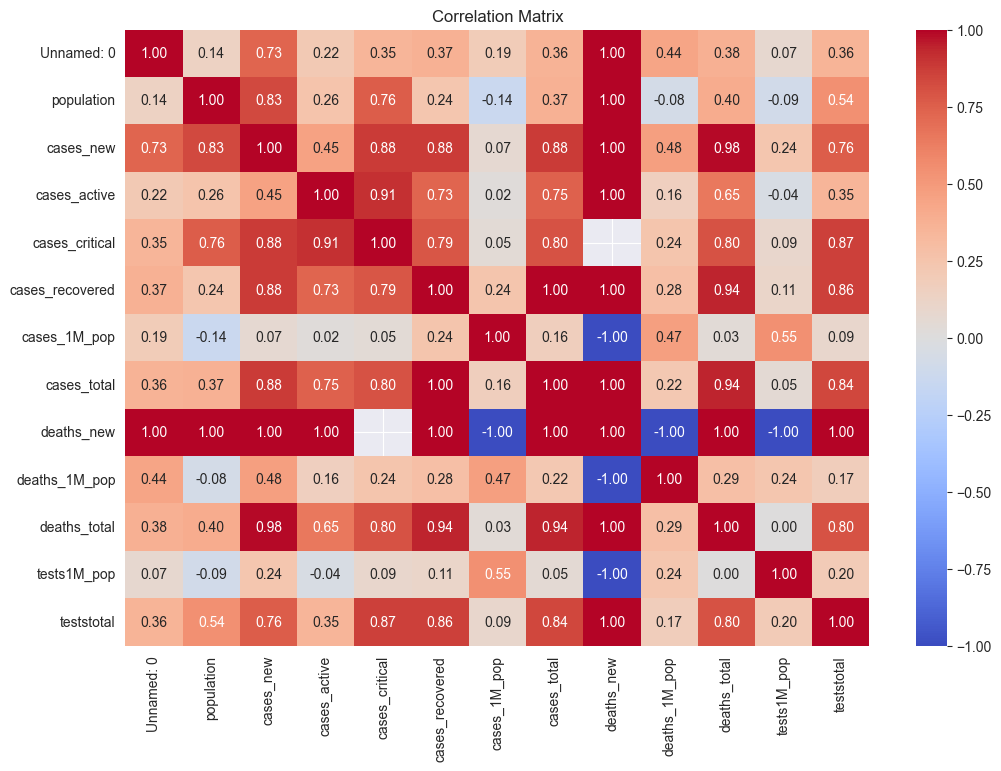

In [52]:
#Find correlation matrix
plt.figure(figsize=(12, 8))

corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [53]:
df['population'].isna().sum()

np.int64(6)

In [54]:
df['population'] = df['population'].fillna(df['population'].mean())

In [55]:
X=df['population']
y=df['cases_total']
print(X.shape)
print(y.shape)

(235,)
(235,)


In [56]:
X=X.to_frame()


Since the data in population and cases_total are  large ranges in data values, to reduce the impact of extreme values (outliers) we are applying Log transformation this reduces the impact of outliers on the model. 

In [57]:
X=np.log(X)

#To avoid log(0) we add 1
y=np.log(y)+1

In [58]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train

,population
119,16.545415
157,16.240813
150,16.887085
160,15.307732
235,17.362078
...,...
108,13.003654
16,10.328625
94,16.820244
181,17.922379


In [61]:
y_train

119    13.492600
157    14.924590
150    14.419135
160    14.873679
235    19.697472
         ...    
108    12.707011
16      9.908154
94     12.402385
181    16.220740
104    12.963166
Name: cases_total, Length: 188, dtype: float64

In [62]:
print(X_train.shape)
print(y_train.shape)

(188, 1)
(188,)


In [63]:
model=LinearRegression()

In [64]:
model.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)
y_pred

array([13.06010689, 15.48776067, 14.98823637, 14.52389773, 12.44514895,
       13.83579445, 15.16321631, 14.53353485, 15.00902516,  9.66869613,
       17.61468739, 10.13502564, 16.29392446, 14.80826588, 15.08023912,
       14.20421046,  9.5680679 , 13.19460318, 15.45717194, 14.0029464 ,
       15.64430778,  9.33792531, 11.64405074, 14.15435267, 15.00902516,
       12.4446512 , 14.08186918, 14.586419  , 13.10879152,  9.69472423,
       12.65492231, 12.68385383, 10.55538783, 12.18555924, 13.88659997,
       13.02778389, 14.59281358, 11.47155838, 14.55162627, 14.26141908,
       14.91198859, 15.5038129 , 13.281477  , 11.32589697, 14.59446626,
       15.91437644, 14.29757352])

In [66]:
model.predict([[1550908]])

C:\Users\Srinidhi.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1091499.74871403])

In [67]:
# Calculate Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 3.6093763033177533
R-squared: 0.5803161736911372
